In [3]:
import os, sys

# Open a file
VCB_PATH = "/home/ubuntu/data/voxceleb1_wav"
names = [d for d in os.listdir(VCB_PATH) if os.path.isdir(os.path.join(VCB_PATH, d))]

audio_clips = {}
for name in names:
    audio_clips[name] = os.listdir(VCB_PATH + '/' + name)

names = sorted(names, key=lambda name : -len(audio_clips[name]))
print(names[:10])
print(audio_clips[names[0]])

['Rob_Reiner', 'Bob_Barker', 'Alan_Alda', 'Stephen_Fry', 'Louis_C.K.', 'Peter_Jackson', 'Vince_Gilligan', 'J.J._Abrams', 'Quentin_Tarantino', 'David_Attenborough']
['sOlWHKGy-SY_0000040.wav', 'lFEBeMFuL_M_0000098.wav', 'eWvntayRfe8_0000001.wav', 'xFTIClN5z70_0000040.wav', 'lFEBeMFuL_M_0000097.wav', 'eWvntayRfe8_0000029.wav', 'xFTIClN5z70_0000093.wav', 'lFEBeMFuL_M_0000091.wav', 'w7DmOHDIMQ8_0000039.wav', 'Hyck_yynhF4_0000008.wav', 'Vzqmi3MAixQ_0000066.wav', 'lFEBeMFuL_M_0000053.wav', 'eWvntayRfe8_0000045.wav', 'sOlWHKGy-SY_0000083.wav', 'xFTIClN5z70_0000012.wav', 'lFEBeMFuL_M_0000028.wav', 'Hyck_yynhF4_0000014.wav', 'lFEBeMFuL_M_0000001.wav', 'lFEBeMFuL_M_0000107.wav', 'xFTIClN5z70_0000076.wav', 'Vzqmi3MAixQ_0000095.wav', 'Hyck_yynhF4_0000055.wav', 'Hyck_yynhF4_0000050.wav', 'w7DmOHDIMQ8_0000096.wav', '6SBGrr4iFp0_0000039.wav', '4p9Fm05hlIM_0000009.wav', 'eWvntayRfe8_0000037.wav', 'xFTIClN5z70_0000014.wav', 'lFEBeMFuL_M_0000041.wav', 'w7DmOHDIMQ8_0000062.wav', 'Vu__sFrtFfY_0000004.wav'

In [4]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd

import librosa
import librosa.display

audio_path = '/'.join([VCB_PATH, names[0], audio_clips[names[0]][0]])
print(audio_path)
ipd.Audio(audio_path)

/home/ubuntu/data/voxceleb1_wav/Rob_Reiner/sOlWHKGy-SY_0000040.wav


120321
(128, 941)
[[  3.10759864e-03   3.99696995e-03   1.24353262e-03 ...,   8.01938735e-02
    8.55960766e-03   7.35738875e-02]
 [  1.43713154e-02   1.02295738e-02   4.84250225e-03 ...,   9.12700457e-02
    5.23104113e-02   1.11940497e-01]
 [  2.63238186e-02   1.68754469e-02   8.66508865e-03 ...,   1.04112134e-01
    9.86870679e-02   1.53542177e-01]
 ..., 
 [  9.55325087e-08   8.59488531e-08   2.51319880e-08 ...,   5.33645582e-04
    3.28103338e-04   2.37834471e-04]
 [  1.52117733e-08   5.86232699e-09   3.27817363e-09 ...,   1.42545216e-03
    3.66180619e-04   2.59150425e-04]
 [  1.78301134e-08   1.16174944e-08   2.36489619e-08 ...,   7.52475456e-04
    2.13912988e-04   1.34996517e-04]]
[[ 0.51009076  0.523754    0.46036979 ...,  0.68655529  0.56509437
   0.6818781 ]
 [ 0.5932247   0.57476983  0.53417137 ...,  0.69357867  0.66336116
   0.70466104]
 [ 0.62608125  0.60194455  0.56575927 ...,  0.70072531  0.69782017
   0.7218161 ]
 ..., 
 [ 0.          0.          0.         ...,  0.414

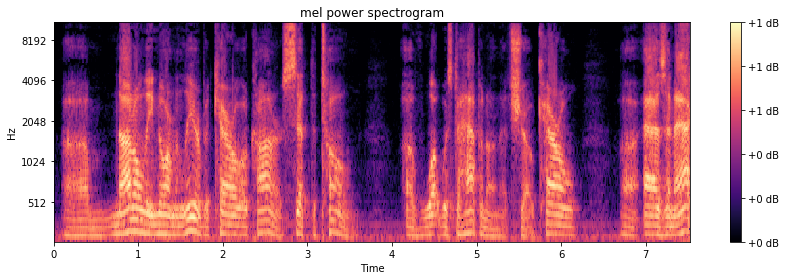

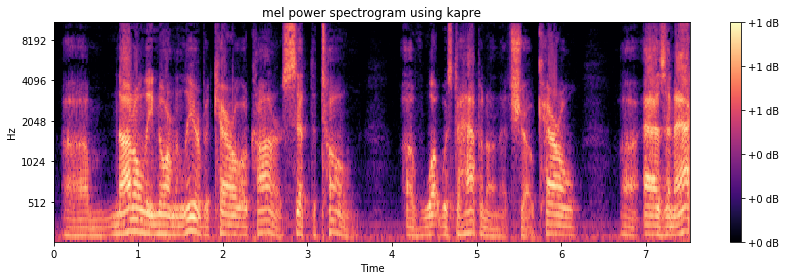

In [26]:
import keras
import kapre
from keras.models import Sequential
from kapre.time_frequency import Melspectrogram
from kapre.utils import Normalization2D

sr = 16000 # sampling rate
n_mels = 128
n_fft = 512
hop_length = 128

def get_audio(audio_path):
    y, sr = librosa.load(audio_path, sr=sr)
    return y

# ALL STUFF HERE IS JUST FOR SHOWING THAT THE SPECTROGRAM GENERATION MATCHES LIBROSA'S

def get_old_spectrogram(audio_path):
    y, sr = librosa.load(audio_path, sr=sr)
    S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
    log_S = librosa.power_to_db(S, ref=np.max)
    mn = np.min(log_S)
    mx = np.max(log_S)
    log_S -= mn
    log_S /= (mx - mn)
    return log_S

# From http://nbviewer.jupyter.org/github/librosa/librosa/blob/master/examples/LibROSA%20demo.ipynb
y, sr = librosa.load(audio_path, sr=sr)
print(len(y))

# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=n_mels, n_fft=n_fft, hop_length=hop_length)
#log_S = librosa.power_to_db(S, ref=np.max)
log_S = get_old_spectrogram(audio_path)
print(log_S.shape)
print(S)
print(log_S)
print(sr)

# Make a new figure
plt.figure(figsize=(12,4))
librosa.display.specshow(log_S, sr=sr, hop_length=128, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

# Spectrogram generation using Kapre https://github.com/keunwoochoi/kapre
def get_spectrogram(audio_path, normalize):
    y, sr = librosa.load(audio_path, sr=16000)
    src = np.random.random((1, len(y)))
    model = Sequential()
    model.add(Melspectrogram(sr=sr, n_mels=128, 
          n_dft=512, n_hop=128, input_shape=src.shape, power_melgram=2.0,
          return_decibel_melgram=True,
          trainable_kernel=False, name='melgram'))
    if normalize:
        model.add(Normalization2D(int_axis=0))
    n_ch, nsp_src = model.input_shape[1:]
    #src, _ = librosa.load(audio_path, sr=sr, mono=True)
    y = y[:nsp_src]
    y_batch = y[np.newaxis, np.newaxis, :]
    pred = model.predict(x=y_batch)
    if keras.backend.image_data_format == 'channels_first':
        S = pred[0, 0]
    else:
        S = pred[0, :, :, 0]
    log_S = S
    return log_S

log_S = get_spectrogram(audio_path, False)
mn = np.min(log_S)
mx = np.max(log_S)
log_S -= mn
log_S /= (mx - mn)

normalized_log_S = get_spectrogram(audio_path, True);

print(np.max(np.abs(log_S - normalized_log_S)))

# Make a new figure
plt.figure(figsize=(12, 4))    
librosa.display.specshow(log_S, sr=sr, hop_length=128, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram using kapre')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()


In [6]:
n_mels = 128
NUM_PEOPLE = 10
AUDIO_LENGTH = 128 * 3 * n_mels # Around 128 columns in spectrogram is one second
AUDIO_GAP = 128 // 2 * n_mels # Gap of half a second
audio = []
speaker = []
for idx, name in enumerate(names[:NUM_PEOPLE]):
    print(name)
    num_clips = 0
    for audio_clip in audio_clips[name]:
        base_clip = get_audio('/'.join([VCB_PATH, name, audio_clip]))
        length = base_clip.shape[0]
        for start in range(0, length - AUDIO_LENGTH + 1, AUDIO_GAP):
            clip = [base_clip[start : start + (AUDIO_LENGTH)]]
            audio += [clip]
            speaker += [np.reshape(np.eye(NUM_PEOPLE)[[idx]], NUM_PEOPLE)]

print(len(audio))
print(len(speaker))

Rob_Reiner
Bob_Barker
Alan_Alda
Stephen_Fry
Louis_C.K.
Peter_Jackson
Vince_Gilligan
J.J._Abrams
Quentin_Tarantino
David_Attenborough
60994
60994


In [8]:
n = len(audio)
import random

asdf = list(zip(audio, speaker))
random.shuffle(asdf)
audio, speaker = list(map(list,zip(*asdf)))

In [9]:
train_size = n // 2
val_size = n // 4
audio_train = np.array(audio[:train_size], dtype=float)
print(audio_train.shape)

speaker_train = np.array(speaker[:train_size], dtype=int)
print(speaker_train.shape)

audio_val = np.array(audio[train_size : train_size + val_size], dtype=float)
print(audio_val.shape)

speaker_val = np.array(speaker[train_size : train_size + val_size], dtype=int)
print(speaker_val.shape)

audio_test = np.array(audio[train_size + val_size:], dtype=float)
print(audio_test.shape)

speaker_test = np.array(speaker[train_size + val_size:], dtype=int)
print(speaker_test.shape)

(30497, 1, 49152)
(30497, 10)
(15248, 1, 49152)
(15248, 10)
(15249, 1, 49152)
(15249, 10)


In [35]:
from keras.layers import *

n_mels = 128
n_dft = 512 
n_hop = 128
HIDDEN_DIM = 128

model = Sequential()
model.add(Melspectrogram(sr=sr, n_mels=n_mels, 
      n_dft=n_dft, n_hop=n_hop, input_shape=(1, AUDIO_LENGTH), 
      return_decibel_melgram=True, power_melgram=2.0,
      trainable_kernel=False, name='melgram'))
model.add(Normalization2D(int_axis=0))
model.add(keras.layers.Reshape((128,384)))
model.add(Permute((2, 1)))
model.add(LSTM(HIDDEN_DIM, return_sequences=True))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(Dense(NUM_PEOPLE, activation='softmax'))
rmsprop = keras.optimizers.RMSprop(lr=0.002, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy', # loss function to be optimized
              metrics=['accuracy']) # doesn't affect optimization
model.fit(audio_train, speaker_train, epochs=5, batch_size=256, shuffle=True)
model.summary()


Epoch 1/5
30497/30497 [==============================] - 85s - loss: 0.9025 - acc: 0.7080    
Epoch 2/5
30497/30497 [==============================] - 85s - loss: 0.3179 - acc: 0.9025    
Epoch 3/5
30497/30497 [==============================] - 84s - loss: 0.1873 - acc: 0.9428    
Epoch 4/5
30497/30497 [==============================] - 84s - loss: 0.1319 - acc: 0.9605    
Epoch 5/5
30497/30497 [==============================] - 84s - loss: 0.0960 - acc: 0.9711    
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
melgram (Melspectrogram)     (None, 128, 384, 1)       296064    
_________________________________________________________________
normalization2d_10 (Normaliz (None, 128, 384, 1)       0         
_________________________________________________________________
reshape_15 (Reshape)         (None, 128, 384)          0         
_________________________________________________________________
pe

In [38]:
print("Train:", evaluate(model, audio_train, speaker_train))

Train: 0.939891247379455


In [39]:
print("Val:", evaluate(model, audio_val, speaker_val))

Val: 0.9401260504201681


In [40]:
print("Test:", evaluate(model, audio_test, speaker_test))

Test: 0.9364495798319328


In [ ]:
plt.plot(losses)

In [10]:
print(len(names))

1251


In [11]:
num_audio_clips = 0
for name in names:
    num_audio_clips += len(audio_clips[name])
print(num_audio_clips)

153516
